In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [49]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
df_data  =train.append(test)


In [50]:
df_data['Fare'] = df_data['Fare'].fillna(df_data['Fare'].median())

df_data['FareBin_4']   = pd.qcut(df_data['Fare'],4)
df_data['FareBin_5']   = pd.qcut(df_data['Fare'],5)
df_data['FareBin_6']   = pd.qcut(df_data['Fare'],6)

In [51]:
label = LabelEncoder()
df_data['FareBin_Code_4'] = label.fit_transform(df_data['FareBin_4'])
df_data['FareBin_Code_5'] = label.fit_transform(df_data['FareBin_5'])
df_data['FareBin_Code_6'] = label.fit_transform(df_data['FareBin_6'])
df_data['Sex']            = label.fit_transform(df_data['Sex'])

In [52]:
df_4 = pd.crosstab(df_data['FareBin_Code_4'],df_data['Pclass'])
df_5 = pd.crosstab(df_data['FareBin_Code_5'],df_data['Pclass'])
df_6 = pd.crosstab(df_data['FareBin_Code_6'],df_data['Pclass'])
display_side_by_side(df_4,df_5,df_6)

Pclass,1,2,3
FareBin_Code_4,,,
0,8,6,323
1,0,128,193
2,77,104,147
3,238,39,46
Pclass,1,2,3
FareBin_Code_5,,,
0,8,6,261
1,0,36,218
2,0,124,132


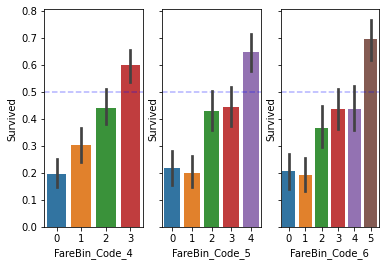

In [53]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3,sharey=True)
for axi in [ax1, ax2, ax3]:
    axi.axhline(0.5,linestyle='dashed', c='blue',alpha = .3)
g1 = sns.barplot(x='FareBin_Code_4', y="Survived", data=df_data,ax=ax1)
g2 = sns.barplot(x='FareBin_Code_5', y="Survived", data=df_data,ax=ax2)
g3 = sns.barplot(x='FareBin_Code_6', y="Survived", data=df_data,ax=ax3)

#plt.close(g1.fig)
#plt.close(g2.fig)
#plt.close(g3.fig)

### 切分完Fare 選取最佳 分割數(欄位代號 15 16 17)

In [54]:
X_train = df_data[:len(train)].iloc[:,[2,4,15]]
X_test  = df_data[len(train):].iloc[:,[2,4,15]]
Y_train = df_data[:len(train)].iloc[:,1].astype('int64')

In [55]:
X_train

,Pclass,Sex,FareBin_Code_4
0,3,1,0
1,1,0,3
2,3,0,1
3,1,0,3
4,3,1,1
...,...,...,...
886,2,1,1
887,1,0,2
888,3,0,2
889,1,1,2


In [56]:
import statsmodels.imputation.mice as mice
imp_train_mice = mice.MICEData(X_train)
train_mice = imp_train_mice.data
imp_test_mice = mice.MICEData(X_test)
test_mice = imp_test_mice.data

In [57]:
from sklearn.preprocessing import Normalizer
Normalizer = Normalizer()
X_train = Normalizer.fit_transform(X_train)
X_test = Normalizer.fit_transform(X_test)

In [58]:
X_test

array([[0.9486833 , 0.31622777, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.81649658, 0.40824829, 0.40824829],
       ...,
       [0.9486833 , 0.31622777, 0.        ],
       [0.90453403, 0.30151134, 0.30151134],
       [0.80178373, 0.26726124, 0.53452248]])

In [59]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)
randomfroest_score = round(RFC.score(X_train, Y_train) * 100, 2)
randomfroest_score

79.8

In [60]:
X_train

array([[0.9486833 , 0.31622777, 0.        ],
       [0.31622777, 0.        , 0.9486833 ],
       [0.9486833 , 0.        , 0.31622777],
       ...,
       [0.83205029, 0.        , 0.5547002 ],
       [0.40824829, 0.40824829, 0.81649658],
       [0.9486833 , 0.31622777, 0.        ]])

In [61]:
index = pd.RangeIndex(start =892, stop =1310 , step =1)
submission = pd.DataFrame(
{"PassengerId" : index ,
 "Survived"    : Y_pred}
)
submission.to_csv("titanic90.csv", index= False)